In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Escritorio/Proyectos/Co2/CO2percapita.csv")


In [11]:
df.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [15]:
df.columns = ['Country', 'Year', 'CO2_per_capita']

In [17]:
df.dropna(subset=['CO2_per_capita'], inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         26182 non-null  object 
 1   Year            26182 non-null  int64  
 2   CO2_per_capita  26182 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 613.8+ KB


In [29]:
emissions_by_country = df.groupby('Country')['CO2_per_capita'].sum().sort_values(ascending=False).head(10)

In [31]:
emissions_by_country

Country
Sint Maarten (Dutch part)    10711.389214
Curacao                       3680.403150
Qatar                         3443.322215
United States                 2279.291235
Brunei                        2206.747431
Kuwait                        2195.994468
Luxembourg                    2005.602631
United Arab Emirates          1878.345939
Bahrain                       1810.036299
United Kingdom                1725.187207
Name: CO2_per_capita, dtype: float64

In [33]:
excluded_countries = ['Mexico', 'India', 'United States', 'Canada', 'United Kingdom'] #Voy a separar los paises que me interesan


In [87]:
df_excluded = df[df['Country'].isin(excluded_countries)]

In [113]:
df_filtrado_year = df[(df['Year'] >= 1950) & (df['Year'] <= 2023) & (df['Country'].isin(excluded_countries))]

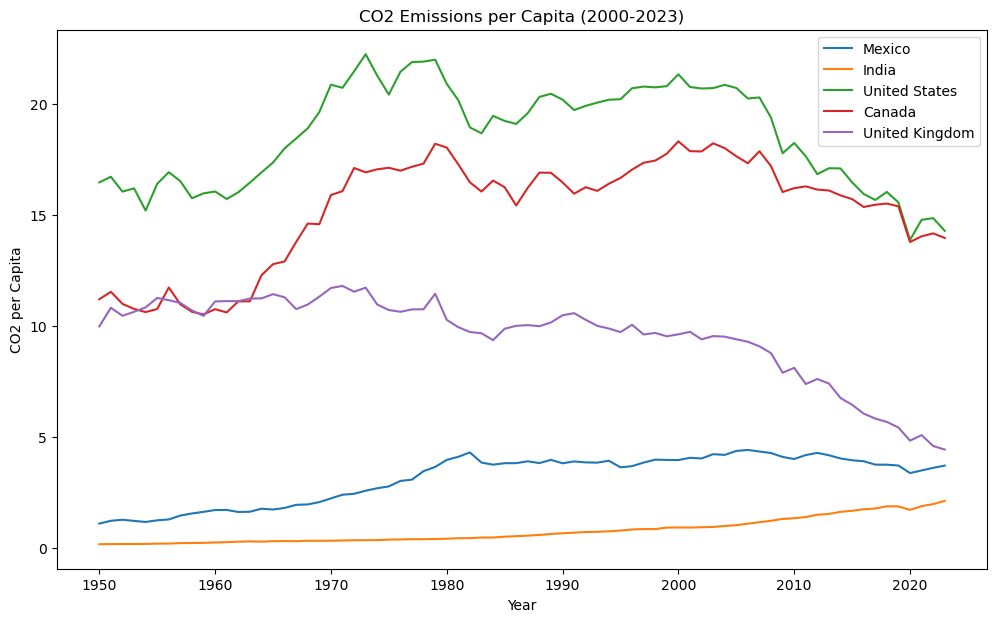

In [115]:
plt.figure(figsize=(12,7))
for country in excluded_countries:
    country_data = df_filtrado_year[df_filtrado_year['Country'] == country]
    plt.plot(country_data['Year'], country_data['CO2_per_capita'], label=country)
plt.xlabel('Year')
plt.ylabel('CO2 per Capita')
plt.title('CO2 Emissions per Capita (2000-2023)')
plt.legend()

In [117]:
df_2023 = df_filtrado_year[df_filtrado_year['Year'] == 2023]

In [121]:
import seaborn as sns

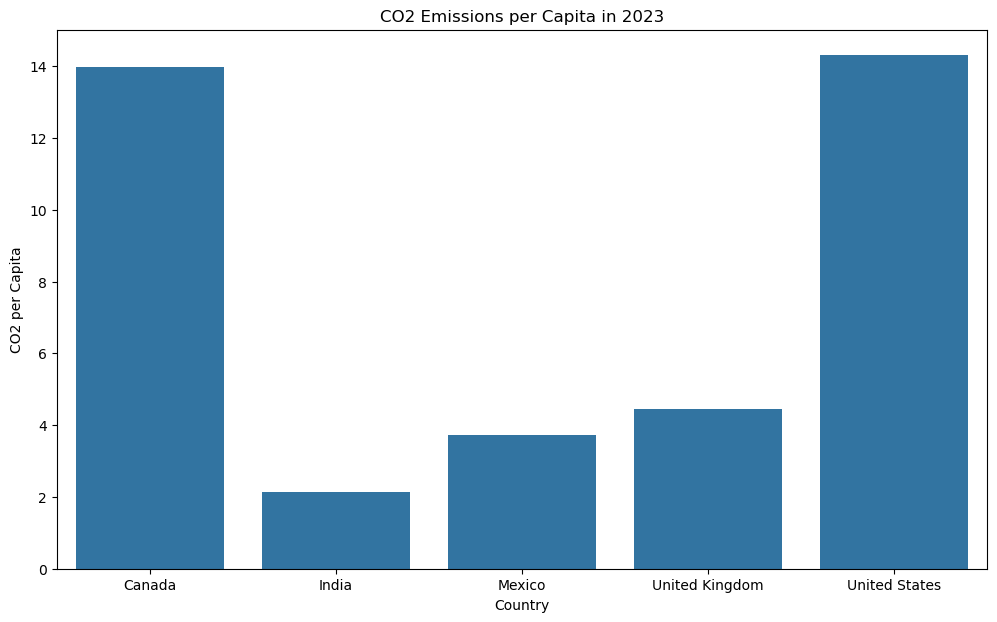

In [123]:
plt.figure(figsize=(12,7))
sns.barplot(x='Country', y='CO2_per_capita', data=df_2023)
plt.title('CO2 Emissions per Capita in 2023')
plt.xlabel('Country')
plt.ylabel('CO2 per Capita')
plt.show()

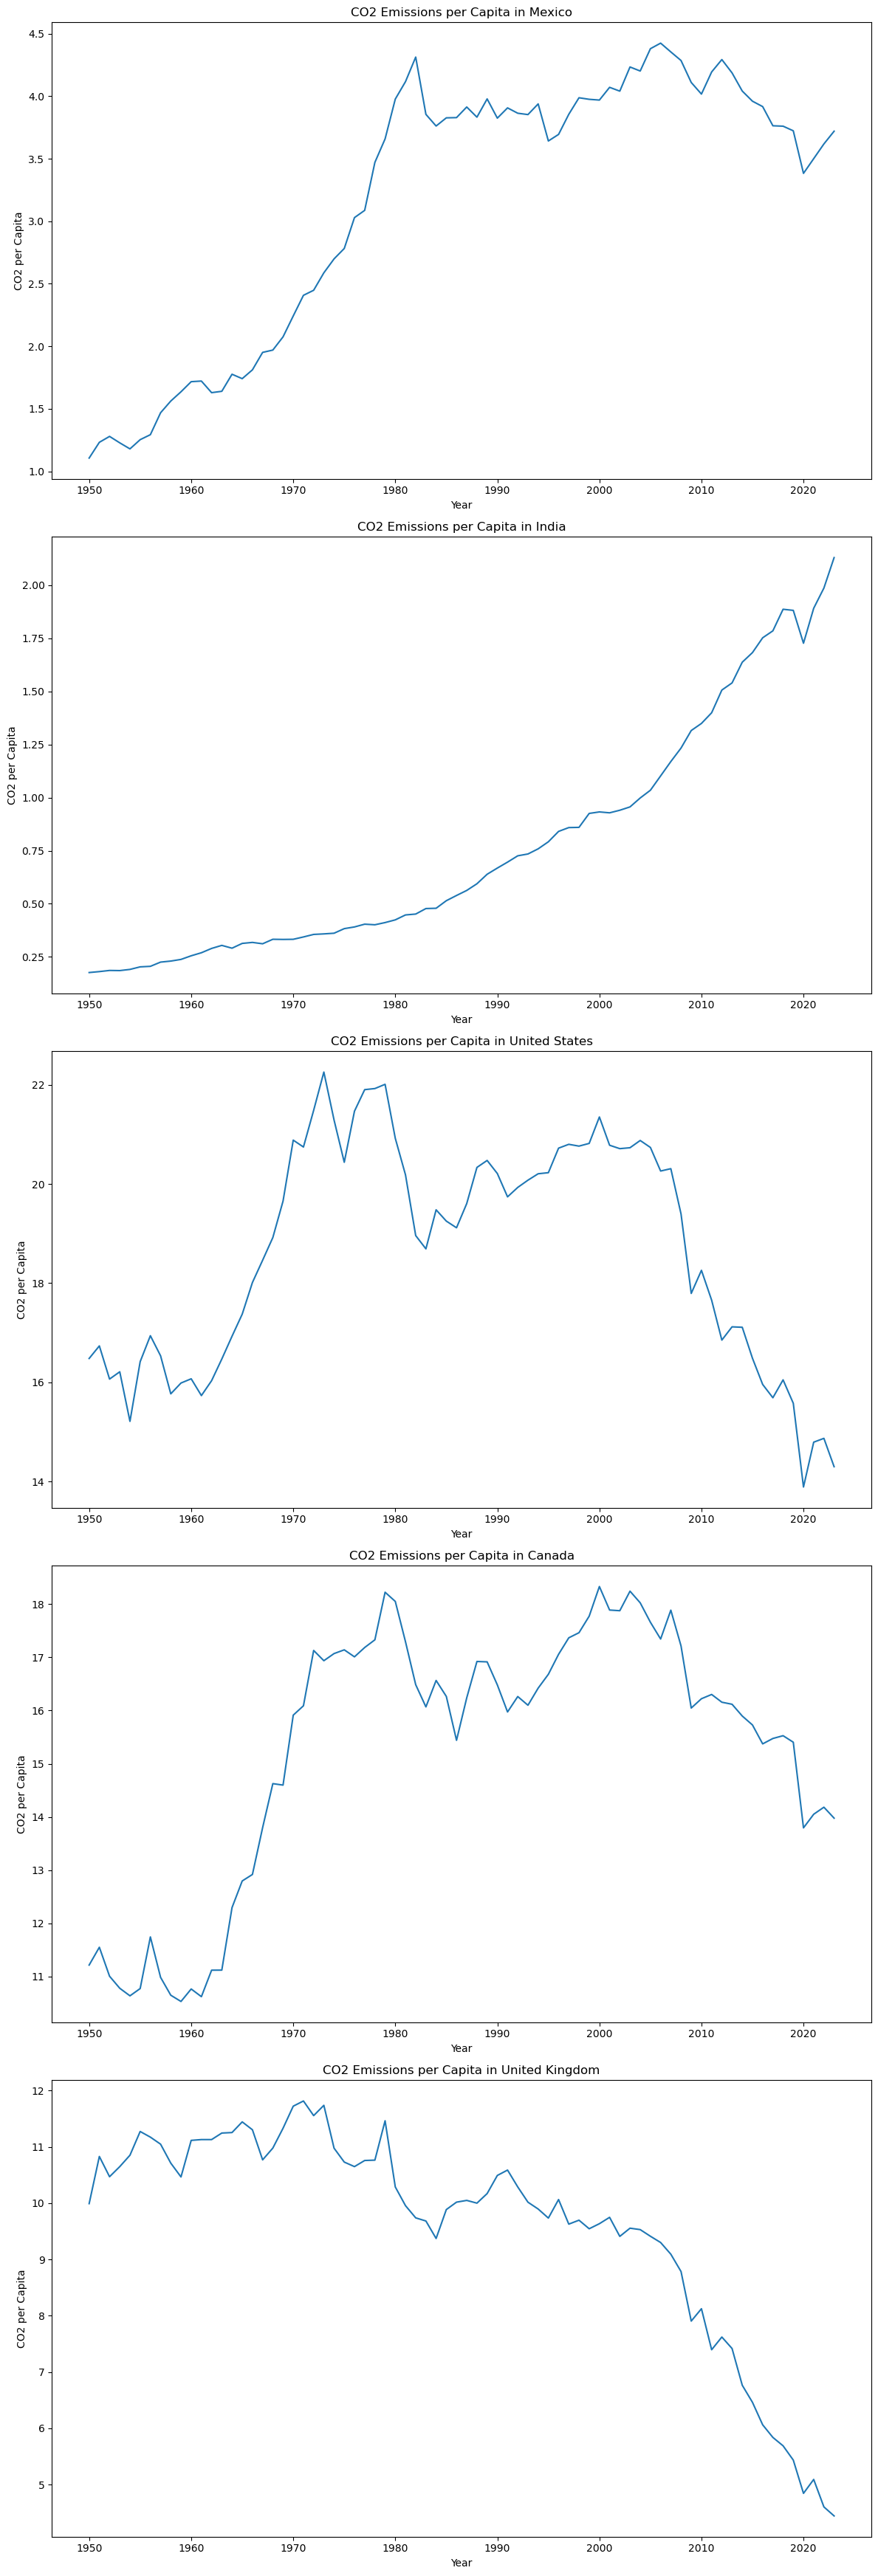

In [125]:
fig, axes = plt.subplots(nrows=len(excluded_countries), ncols=1, figsize=(12, 7*len(excluded_countries)))

for i, country in enumerate(excluded_countries):
    country_data = df_filtrado_year[df_filtrado_year['Country'] == country]
    axes[i].plot(country_data['Year'], country_data['CO2_per_capita'])
    axes[i].set_title(f'CO2 Emissions per Capita in {country}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('CO2 per Capita')

plt.tight_layout()
plt.show()

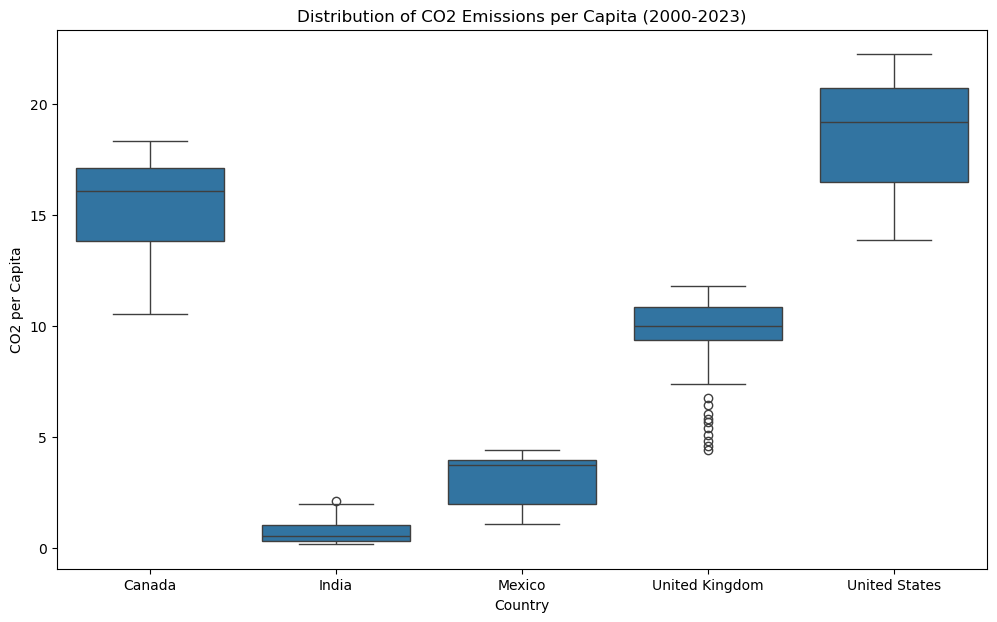

In [129]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Country', y='CO2_per_capita', data=df_filtrado_year)
plt.title('Distribution of CO2 Emissions per Capita (2000-2023)')
plt.xlabel('Country')
plt.ylabel('CO2 per Capita')
plt.show()